## Load Data from CSVs

In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename,'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [2]:
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': '2014-11-10',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_udacity': 'True',
 'is_canceled': 'True'}

In [3]:
daily_engagement[0]

{'acct': '0',
 'utc_date': '2015-01-09',
 'num_courses_visited': '1.0',
 'total_minutes_visited': '11.6793745',
 'lessons_completed': '0.0',
 'projects_completed': '0.0'}

In [4]:
project_submissions[0]

{'creation_date': '2015-01-14',
 'completion_date': '2015-01-16',
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Fixing Data Types

In [5]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [6]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [7]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [8]:
#####################################
#                 2                 #
#####################################


## Change the "acct" field to "account_key" in the daily_engagement 
## $$pour matcher avec les autres tables$$


for engagement in daily_engagement: 
    engagement['account_key'] = engagement['acct']#add new column copying account_key
    del[engagement['acct']]#remove the current acct column
    
daily_engagement[0]
        

{'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0,
 'account_key': '0'}

In [23]:
## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_unique_students(data):
    unique_students = set()
    for data_point in data: 
        unique_students.add(data_point['account_key'])
    return unique_students


In [24]:
print(len(enrollments))
unique_students_enrolled = get_unique_students(enrollments)
print(len(unique_students_enrolled))

print('*******************')
print(len(daily_engagement))
unique_engagement_students = get_unique_students(daily_engagement)
print(len(unique_engagement_students))

print('*******************')
print(len(project_submissions))
unique_project_submitters = get_unique_students(project_submissions)
print(len(unique_project_submitters))

1640
1302
*******************
136240
1237
*******************
3642
743


## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [28]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

#rechercher les étudiants qui sont enrolled mais n'apparaissent pas dans le daily_engagement

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break
        
    

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


## Checking for More Problem Records

In [31]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

# Find students who enrolled,
# don't have engagement numbers, and stayed enrolled at least a day

num_problem_students = 0

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment)
        num_problem_students += 1
        print(num_problem_students)
        


{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
1
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
2
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}
3


## Tracking Down the Remaining Problems

In [32]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [33]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [35]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [44]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. 
#  The keys = account keys and the values = the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    # If the student is still enrolled or they took more than 7 days to cancel, we will consider them
    # a paid student
    # si N'EST PAS  x[a annulé] et si x[est ne peut plus annuler]
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        #print(paid_students)
        
        # Add this student to the dictionary if they are not already present, or if this enrollment date
        # is the most recent one we've seen so far
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
print(len(paid_students))


995


## Getting Data from First Week

In [57]:
# Given some data with an account_key field, removes any records corresponding to accounts that canceled with
# seven days
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data :
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data


In [60]:
# Remove data from students who canceled within 7 days from all three tables
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [62]:
# Create a binary version of the num_courses_visited field, equal to
# 1 if the student visited at least one course, and 0 otherwise.

for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [64]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

# Collect all the engagement records that come in the first week of the student's most recent enrollment
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print(len(paid_engagement_in_first_week))


6919


## Exploring Student Engagement

In [77]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
print(type(engagement_by_account))


##### Pareil avec fonction ################

# Create a dictionary of engagement grouped by the given key name.
# The keys are the fields from the data in the key_name column,
# and the values are lists of data points.

#crée un dico d'engagement par un nom donné : 
# key = key_name
# values = liste de data_point

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
    
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')


<class 'collections.defaultdict'>


In [79]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
      
# Takes a dictionary of grouped data as output by group_data, as well as a field name to sum over,
# and returns a new dictionary with that field summed up and other fields discarded.
# The keys of the resulting dictionary will be the same as the keys of the original,
# and the values will be numbers containing the total value of the given field across all data points for the
# associated key.


def sum_grouped_items(grouped_data,field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key]= total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
#print(total_minutes_by_account)


{'0': 494.88049616599994, '1': 18.576384666670002, '2': 0.0, '3': 0.0, '4': 33.3214046667, '5': 329.7578566663, '6': 780.4545511666701, '7': 104.20388850009999, '8': 989.113641833, '9': 448.471384167, '10': 130.12347833367, '11': 0.0, '12': 179.4719088333, '13': 1013.3833969996999, '14': 65.6221875, '15': 983.375040335, '16': 119.12030049999998, '17': 235.49969150033, '18': 155.1361575, '19': 0.0, '20': 447.93897783336996, '21': 931.1036911666699, '22': 657.2052335000001, '23': 1591.3228143334, '24': 943.188117167, '25': 0.0, '26': 430.801675833, '27': 1579.12122666663, '28': 766.256315667, '29': 556.1906033333, '30': 69.6578351667, '31': 0.0, '32': 123.2915048333, '33': 253.9870258334, '34': 180.413814, '35': 765.6402170004, '36': 809.2138958339, '37': 1378.195091668, '38': 0.0, '39': 1001.5888595, '40': 478.21952616690004, '41': 511.925391, '42': 576.4643026663, '43': 88.822038, '44': 0.0, '45': 0.0, '46': 26.1189351667, '47': 854.8288881656, '48': 1055.6871896667, '49': 0.0, '50': 4

In [73]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = list(total_minutes_by_account.values())
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


Populating the interactive namespace from numpy and matplotlib
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


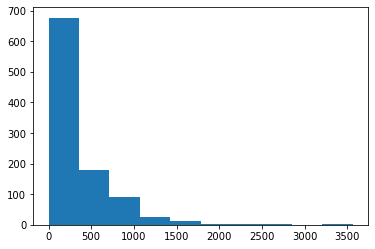

In [81]:

%pylab inline

import matplotlib.pyplot as plt 
import numpy as np

# Summarize the given data


def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)

describe_data(list(total_minutes_by_account.values()))
    

## Debugging Data Analysis Code

In [84]:
# Find the student who spent the most minutes during the first week

student_with_max_minutes = None 
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes
student_with_max_minutes 

'163'

In [83]:
# Print out every engagement record for the student who spent the most minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)


{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163', 'has_visited': 1}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'account_key': '

## Lessons Completed in First Week

Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


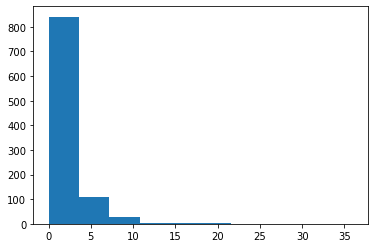

In [85]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
describe_data(list(lessons_completed_by_account.values()))

## Number of Visits in First Week

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


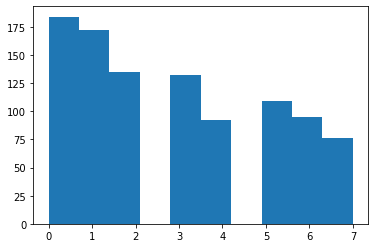

In [86]:
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
describe_data(list(days_visited_by_account.values()))

## Splitting out Passing Students

In [88]:
# Create a set of all account keys that eventually passed the subway project
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    # These two project ids correspond to different versions of the subway project, and both
    # PASSED and DISTINCTION indicate that the student passed the project
    
    
    if (project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])
        
print(len(pass_subway_project))


647


In [89]:
# Engagement data for students who eventually pass the subway project
passing_engagement = []
# Engagement data for students who do not eventually pass the subway project
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

## Comparing the Two Student Groups

In [90]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

## Making Histograms

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


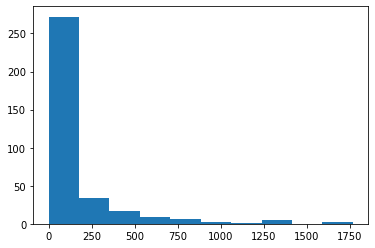

passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997


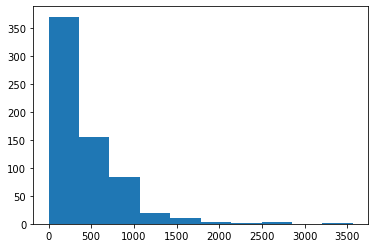

In [93]:
print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(list(non_passing_minutes.values()))

# Adding plt.show() after each plot will cause the two plots in this cell to display separately,
# rather than on top of each other
plt.show()

print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
describe_data(list(passing_minutes.values()))
plt.show()

non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


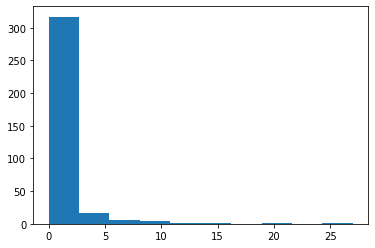

passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36


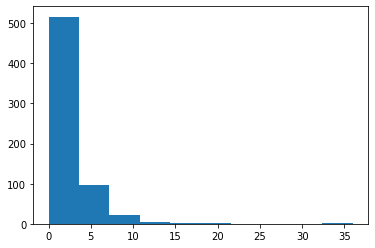

In [94]:
print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
describe_data(list(non_passing_lessons.values()))
plt.show()

print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
describe_data(list(passing_lessons.values()))
plt.show()

non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


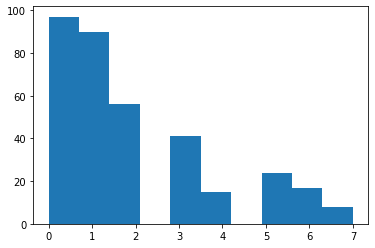

passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


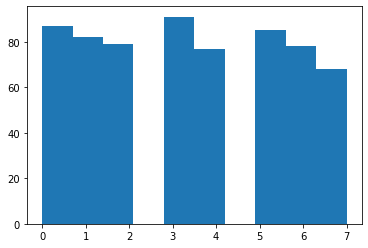

In [95]:
print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(list(non_passing_visits.values()))
plt.show()

print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
describe_data(list(passing_visits.values()))
plt.show()

## Improving Plots and Sharing Findings

In [ ]:
# Import seaborn for aesthetic improvements
import seaborn as sns

# Use bins=8 since there are exactly 8 possible values for this variable - 0 through 7 inclusive
plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week for students who do not pass the subway project')